##Imports

In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

##Load data

In [ ]:
file_path="/content/Churn_Modelling.csv"
df=pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Preprocessing

In [ ]:
##Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Check fo duplicate rows
df.duplicated().sum()

0

In [ ]:
#Check how many customers have exited bank
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
#Check how many categories do we have in geography column
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
#Dropping first three columns
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Encoding categorical columns
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


##Start building the model

In [ ]:

#Split data into train and test
X=df.drop('Exited',axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#Scale values
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11)) ##hidden layer
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))    ##output layer

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [60]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=50)

Epoch 1/100
128/128 [==============================] - 4s 8ms/step - loss: 0.3143 - accuracy: 0.8642 - val_loss: 0.3452 - val_accuracy: 0.8625
Epoch 2/100
128/128 [==============================] - 1s 7ms/step - loss: 0.3134 - accuracy: 0.8662 - val_loss: 0.3446 - val_accuracy: 0.8600
Epoch 3/100
128/128 [==============================] - 1s 5ms/step - loss: 0.3135 - accuracy: 0.8664 - val_loss: 0.3453 - val_accuracy: 0.8612
Epoch 4/100
128/128 [==============================] - 1s 5ms/step - loss: 0.3137 - accuracy: 0.8637 - val_loss: 0.3453 - val_accuracy: 0.8606
Epoch 5/100
128/128 [==============================] - 1s 6ms/step - loss: 0.3138 - accuracy: 0.8650 - val_loss: 0.3455 - val_accuracy: 0.8587
Epoch 6/100
128/128 [==============================] - 1s 8ms/step - loss: 0.3131 - accuracy: 0.8647 - val_loss: 0.3450 - val_accuracy: 0.8612
Epoch 7/100
128/128 [==============================] - 1s 7ms/step - loss: 0.3134 - accuracy: 0.8628 - val_loss: 0.3462 - val_accuracy: 0.8606

In [61]:
model.layers[0].get_weights()

[array([[ 4.32739377e-01,  3.74990923e-05,  1.76937625e-01,
          1.26852110e-01, -1.47445902e-01, -1.79538041e-01,
          8.32675397e-02,  5.17569929e-02, -2.95019418e-01,
          5.48459552e-02,  2.87986428e-01],
        [ 1.31905898e-01,  7.48431683e-02,  2.01995701e-01,
          4.46786314e-01,  1.32626283e+00,  6.29439414e-01,
          9.50245321e-01, -5.95948279e-01, -3.90636772e-01,
         -3.42189312e-01,  3.00299581e-02],
        [ 2.60204732e-01,  2.17094794e-01,  1.74945876e-01,
          3.44331086e-01, -2.89987829e-02,  2.00228885e-01,
          1.20273896e-01, -6.49710000e-02, -5.38066030e-02,
         -3.91920924e-01,  2.71078274e-02],
        [ 5.55391133e-01, -7.59511471e-01, -1.29587877e+00,
         -5.59327900e-01, -6.45944178e-01, -9.41901505e-02,
          8.61679167e-02, -3.34571332e-01, -8.05200487e-02,
         -4.50257123e-01,  3.89470667e-01],
        [-6.72640204e-01,  3.94954234e-02, -4.75891978e-01,
          3.20173025e-01, -8.85463595e-01, -

In [62]:
y=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [63]:
#converting output to 1s and 0s
y=np.where(y>0.5,1,0)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [64]:
accuracy_score(y_test,y)

0.86

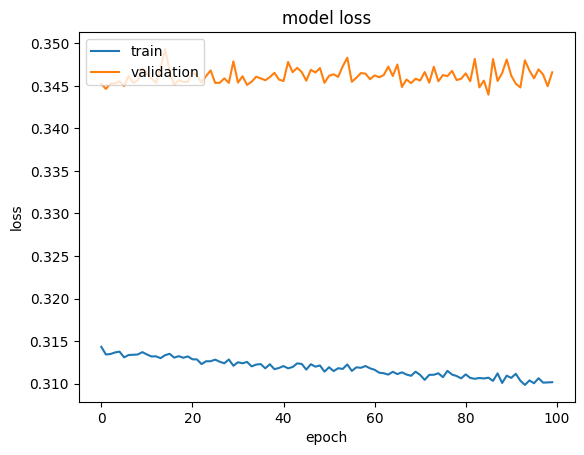

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()